C:\Users\rudra\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:189: UserWarning: When passing multiple axes, layout keyword is ignored
  warnings.warn(


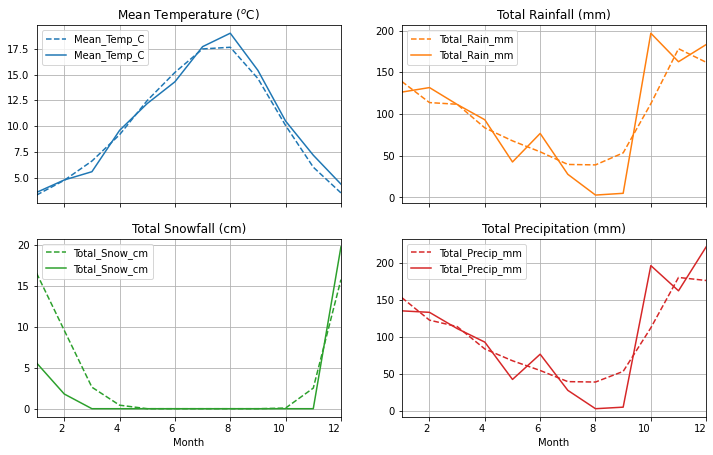

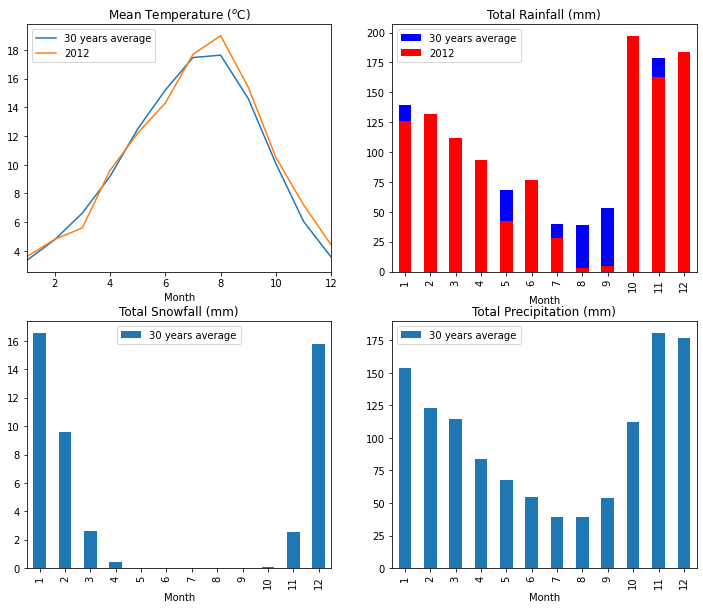

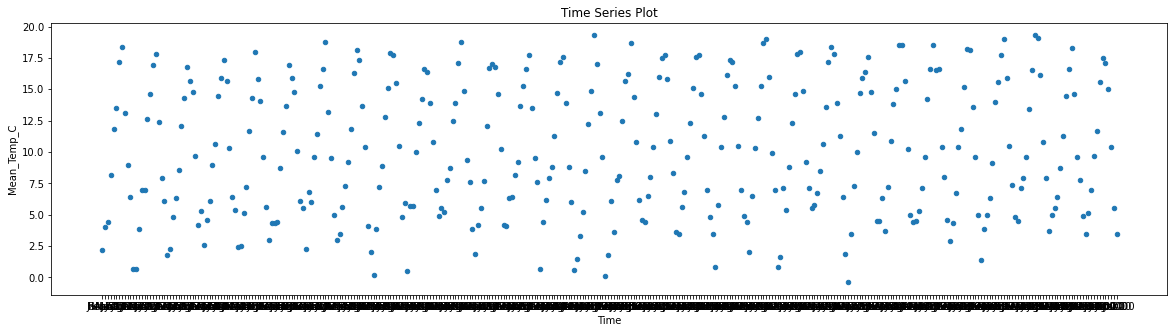

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Vancouver_International_Airport_for_Python.csv',index_col='Year')
df = df.rename(columns={'Mean Temp (°C)': 'Mean_Temp_C','Total Rain (mm)':'Total_Rain_mm','Total Snow (cm)':'Total_Snow_cm',
                        'Total Precip (mm)':'Total_Precip_mm','Date/Time':'Time'})
data = df[['Month', 'Mean_Temp_C','Total_Rain_mm','Total_Snow_cm','Total_Precip_mm','Time']] # create a data with selected var
nan_df = data[data.isna().any(axis=1)] # create a nan data frame 
data_30yrs = data.loc[1971:2000] # select data from the year 1971 to 2000 (30 years)
Mean_monthly = data_30yrs.groupby('Month').mean().round(2) # divide dataset in month and calculate mean with two decimal places

MAM_T = Mean_monthly['Mean_Temp_C'].loc[3:5].mean() # seasonal mean temperature March, April and May 
JJA_T = Mean_monthly['Mean_Temp_C'].loc[6:8].mean() # seasonal mean temperature June, July and August
SON_T = Mean_monthly['Mean_Temp_C'].loc[9:11].mean() # seasonal mean temperature Sept, Oct. and Nov. 

data_2012 = data.loc[2012].groupby('Month').mean().round(2)

seasonal_Temp_30yrs = data_30yrs.groupby('Month')



###### subplots method 1 ##########

ax = Mean_monthly.plot(figsize=(12,8), subplots=True,layout=(2,2), style= '--',title=["Mean Temperature ($^{o}$C)","Total Rainfall (mm)","Total Snowfall (cm)","Total Precipitation (mm)"],
                legend=True,grid=True,xlim=[1,12], label='30 year average')
data_2012.plot(figsize=(12,8), subplots=True,layout=(2,2), title=["Mean Temperature ($^{o}$C)","Total Rainfall (mm)","Total Snowfall (cm)","Total Precipitation (mm)"],
                 legend=True,grid=True,xlim=[1,12],label='2012',ax=ax)
plt.savefig('subplots_method1.png',dpi=300)

######################## subplots method 2 ###################

fig, axes = plt.subplots(2,2)
Mean_monthly.plot(figsize=(12,10),y='Mean_Temp_C',ax=axes[0,0], kind='line',title="Mean Temperature ($^{o}$C)", legend=True,xlim=[1,12],label='30 years average')
data_2012.plot(figsize=(12,10),y='Mean_Temp_C',ax=axes[0,0], kind='line',title="Mean Temperature ($^{o}$C)", legend=True,xlim=[1,12],label='2012')

Mean_monthly.plot(figsize=(12,10),y='Total_Rain_mm',ax=axes[0,1], kind='bar',color='blue',title="Total Rainfall (mm)", legend=True,xlim=[1,12],label='30 years average')
data_2012.plot(figsize=(12,10),y='Total_Rain_mm',ax=axes[0,1], kind='bar',color='red',title="Total Rainfall (mm)", legend=True,xlim=[1,12],label='2012')


Mean_monthly.plot(figsize=(12,10),y='Total_Snow_cm',ax=axes[1,0], kind='bar',title="Total Snowfall (mm)", legend=True,xlim=[1,12],label='30 years average')

Mean_monthly.plot(figsize=(12,10),y='Total_Precip_mm',ax=axes[1,1], kind='bar',title="Total Precipitation (mm)", legend=True,xlim=[1,12],label='30 years average')

plt.savefig('subplots_method2.png',dpi=300)

########### time series plotting ###############

data_30yrs.plot(figsize=(20,5),x='Time',y='Mean_Temp_C',kind='scatter',title='Time Series Plot')
plt.savefig('Timeseries_1971_2000.png', dpi=300)





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AFE1EC2E0>,
      dtype=object)

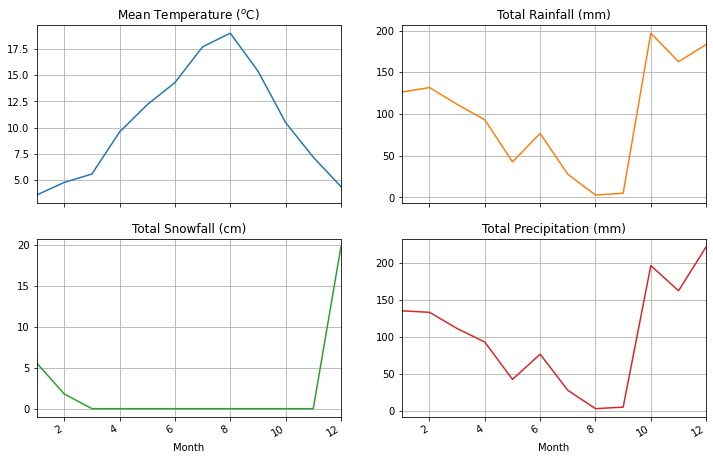

In [28]:
data_2012 = data.loc[2012].groupby('Month').mean().round(2)
data_2012.plot(figsize=(12,8), subplots=True,layout=(2,2), title=["Mean Temperature ($^{o}$C)","Total Rainfall (mm)","Total Snowfall (cm)","Total Precipitation (mm)"],
                 legend=False,grid=True,xlim=[1,12])

In [29]:
print(data_30yrs.head)

<bound method NDFrame.head of       Month  Mean_Temp_C  Total_Rain_mm  Total_Snow_cm  Total_Precip_mm  \
Year                                                                      
1971      1          2.2          140.7          121.9            210.3   
1971      2          4.0          113.8           32.3            142.0   
1971      3          4.4          152.1            7.6            159.8   
1971      4          8.2           50.5            0.0             50.5   
1971      5         11.8           42.4            0.0             42.4   
...     ...          ...            ...            ...              ...   
2000      8         17.1            6.0            0.0              6.0   
2000      9         15.0           48.0            0.0             48.0   
2000     10         10.4          125.2            0.0            125.2   
2000     11          5.5           74.0            0.0             74.0   
2000     12          3.5          123.0           15.0            137.

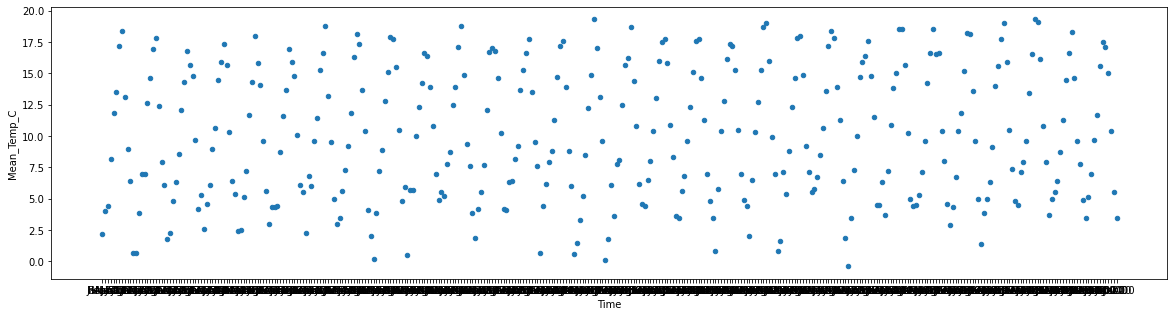

In [30]:
data_30yrs.plot(figsize=(20,5),x='Time',y='Mean_Temp_C',kind='scatter')

In [31]:
df = df.rename(columns={'Mean Temp (°C)': 'Mean_Temp_C','Total Rain (mm)':'Total_Rain_mm','Total Snow (cm)':'Total_Snow_cm','Total Precip (mm)':'Total_Precip_mm'})

In [32]:
data = df[['Month', 'Mean_Temp_C','Total_Rain_mm','Total_Snow_cm','Total_Precip_mm']]
nan_df = data[data.isna().any(axis=1)]
data_30yrs = data.loc[1971:2000]

In [33]:
Mean_monthly = data_30yrs.groupby('Month').mean().round(2)

In [82]:
print((Mean_monthly))
print(Mean_monthly['Mean_Temp_C'].loc[3:5].mean())

       Mean_Temp_C  Total_Rain_mm  Total_Snow_cm  Total_Precip_mm
Month                                                            
1             3.34         139.10          16.58           153.58
2             4.77         113.81           9.59           123.02
3             6.63         111.79           2.63           114.27
4             9.18          83.49           0.43            83.96
5            12.49          67.92           0.00            67.92
6            15.21          54.76           0.00            54.76
7            17.48          39.62           0.00            39.62
8            17.64          39.08           0.00            39.08
9            14.61          53.49           0.00            53.49
10           10.07         112.47           0.08           112.59
11            6.04         178.42           2.52           180.92
12            3.55         162.13          15.79           176.78
9.433333333333332


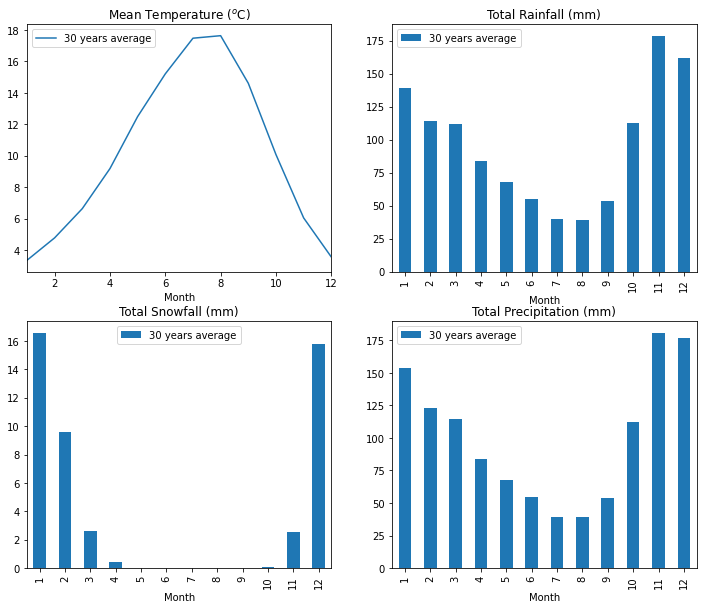

In [144]:
fig, axes = plt.subplots(2,2)
Mean_monthly.plot(figsize=(12,10),y='Mean_Temp_C',ax=axes[0,0], kind='line',title="Mean Temperature ($^{o}$C)", legend=True,xlim=[1,12],label='30 years average')
Mean_monthly.plot(figsize=(12,10),y='Total_Rain_mm',ax=axes[0,1], kind='bar',title="Total Rainfall (mm)", legend=True,xlim=[1,12],label='30 years average')
Mean_monthly.plot(figsize=(12,10),y='Total_Snow_cm',ax=axes[1,0], kind='bar',title="Total Snowfall (mm)", legend=True,xlim=[1,12],label='30 years average')
Mean_monthly.plot(figsize=(12,10),y='Total_Precip_mm',ax=axes[1,1], kind='bar',title="Total Precipitation (mm)", legend=True,xlim=[1,12],label='30 years average')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E135D38E80>,
      dtype=object)

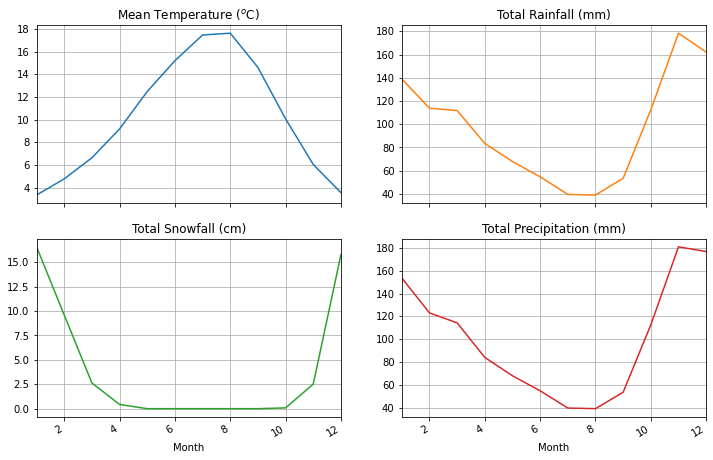

In [88]:
Mean_monthly.plot(figsize=(12,8), subplots=True,layout=(2,2), title=["Mean Temperature ($^{o}$C)","Total Rainfall (mm)","Total Snowfall (cm)","Total Precipitation (mm)"],
                 legend=False,grid=True,xlim=[1,12])
